In [1]:
from fastai.text.all import *

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

(#1) [Path('/home/user/.fastai/data/imdb_sample/texts.csv')]

In [3]:
df = pd.read_csv(path/'texts.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
dfa = df[df['is_valid'] == True].iloc[:8,:]
dfb = df[df['is_valid'] == False].iloc[:8,:]
df2 = pd.concat((dfa, dfb))
df2.shape

(16, 3)

In [6]:
dbunch_lm = TextDataLoaders.from_df(df2, 
                                    text_col='text', 
                                    label_col='label', 
                                    path=path, 
                                    is_lm=True, 
                                    valid_col='is_valid',
                                     bs=4)

/home/user/anaconda3/envs/devfastai/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [7]:
learn = language_model_learner(dbunch_lm, AWD_LSTM, 
                               cbs = [ShowGraphCallback],
                              )

epoch,train_loss,valid_loss,time
0,3.725729,3.050753,00:11
1,3.621147,3.018720,00:11


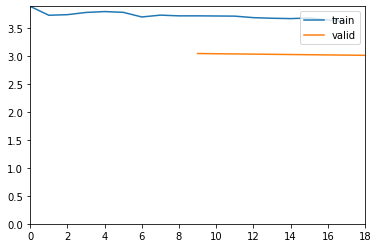

In [8]:
learn.fit(2)

In [9]:
learn.predict("this movie was", 10, temperature=0.75) 

'this movie was also the first of the Prince Of'